In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(123)

In [2]:
x = np.linspace(-5,5,11)
print(x)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [3]:
error = np.random.normal(0,1,11) # create some errors
print(error)

[-0.15711121 -1.754855   -0.83072256  2.80116635  0.48291144  0.85539378
 -1.81333235 -0.00397765 -0.18426387  0.72477262  0.05076761]


In [4]:
y = 2*x + error
sd = np.ones(11)

<ErrorbarContainer object of 3 artists>

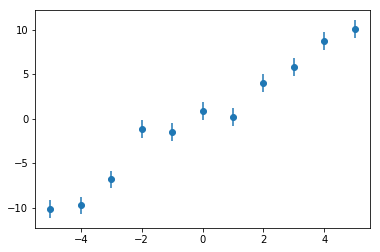

In [5]:
plt.errorbar(x,y,yerr=sd,fmt="o")

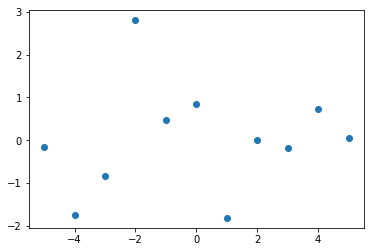

In [6]:
res = y - 2*x
plt.plot(x,res,"o")

In [7]:
p = np.polyfit(x,y,1)
print(p)

[2.04537044 0.01552265]


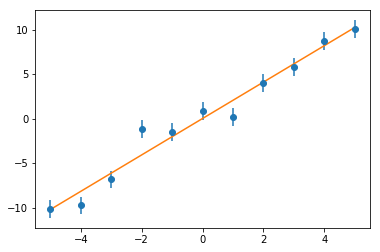

In [8]:
yfit = p[1] +p[0]*x
plt.errorbar(x,y,yerr=sd,fmt="o")
plt.plot(x,yfit)

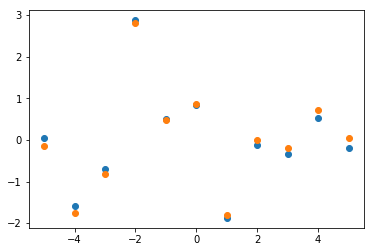

In [9]:
resfit = y - yfit
plt.plot(x,resfit,"o")
plt.plot(x,res,"o")

In [10]:
y2 = 2*x + 0.1*x**2 + np.random.normal(0,1,11)

In [11]:
p1 = np.polyfit(x,y2,1)
print(p1)

[1.96000736 1.29711736]


In [12]:
p2 = np.polyfit(x,y2,2)
print(p2)

[0.11891664 1.96000736 0.10795099]


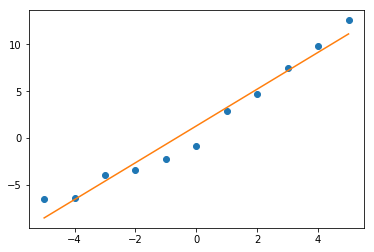

In [13]:
y2fit = p1[1] + p1[0]*x
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

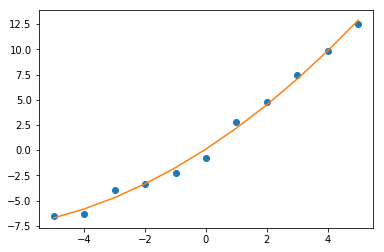

In [14]:
y2fit = p2[2] + p2[1]*x + p2[0]*x**2
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

In [15]:
chisq_list = []
for i in range(1000):
    y=2*x +np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

/Users/hstrey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00992091, 0.04216388, 0.07440685, 0.11099022, 0.09672891,
        0.08494782, 0.06758622, 0.0477444 , 0.03844354, 0.01860171,
        0.01116103, 0.00496046, 0.00682063, 0.00248023, 0.00124011,
        0.        , 0.00124011, 0.        , 0.        , 0.00062006]),
 array([ 0.6591877 ,  2.27194244,  3.88469717,  5.49745191,  7.11020664,
         8.72296138, 10.33571611, 11.94847085, 13.56122558, 15.17398032,
        16.78673505, 18.39948979, 20.01224452, 21.62499926, 23.23775399,
        24.85050873, 26.46326346, 28.0760182 , 29.68877293, 31.30152767,
        32.9142824 ]),
 <a list of 20 Patch objects>)

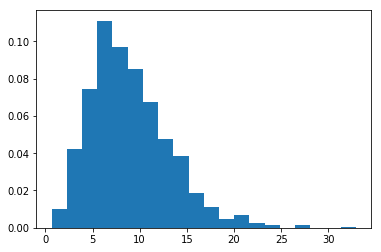

In [16]:
plt.hist(chisq,bins=20,normed=True)

In [17]:
print(chisq.mean())

8.987759134590473


In [18]:
from scipy.stats import chi2

In [19]:
chi = np.linspace(0,50,200)
chi2distr = chi2.pdf(chi,9)

/Users/hstrey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


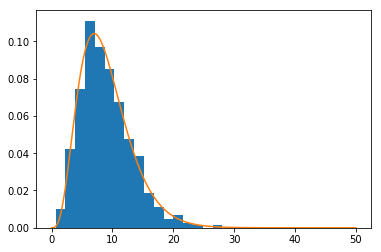

In [20]:
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

In [21]:
chisq_list = []
for i in range(1000):
    y=2*x +0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

/Users/hstrey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


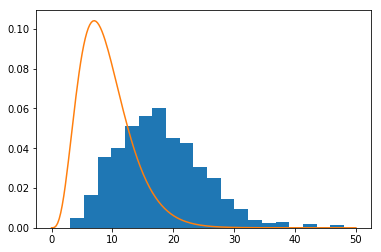

In [22]:
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

In [23]:
chisq_list = []
for i in range(1000):
    y=2*x +0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,2)
    res = y-p[0]*x**2 - p[1]*x - p[2]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

/Users/hstrey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


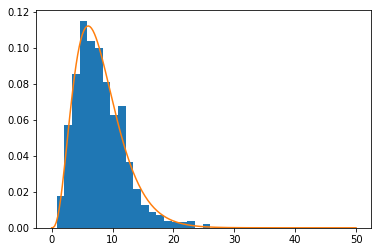

In [24]:
chi = np.linspace(0,50,200)
chi2distr = chi2.pdf(chi,8)
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

(array([ 1.91121352, -0.26596531]), array([[4.64243473e-03, 1.87522906e-19],
       [1.87522906e-19, 4.64243473e-02]]))


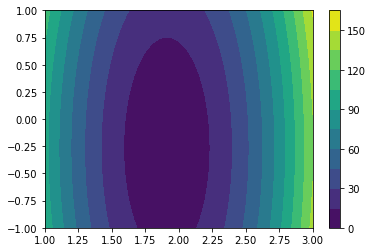

In [85]:
# let us plot the two-dimensional chi^2 distribution
m = np.linspace(1,3,401)
b = np.linspace(-1,1,401)

def chi2linefit(m,b,datax,datay):
    x = datax.T[:,np.newaxis,np.newaxis]
    y = datay.T[:,np.newaxis,np.newaxis]
    res2 = m*x
    res3 = b.T[:,:,np.newaxis]
    res12 = y - res2
    res123 = res12.T - res3
    res123 = res123.T**2
    chisquare = np.sum(res123,axis=0)
    return chisquare

x = np.linspace(-5,5,11)
y=2*x + np.random.normal(0,1,11)
print(np.polyfit(x,y,1,cov=True))
#print(x.shape,y.shape)


M,B = np.meshgrid(m,b)
#print(M.shape)
Z = chi2linefit(M,B,x,y)
plt.contourf(M, B, Z,10)
plt.colorbar()

In [41]:
# in the following cells, I am illustrating how I came up with the matrix calculation
m = np.array([[1,2],[3,4]])
m.shape

(2, 2)

In [42]:
x = np.array([1,2,3]).T
x = x[:,np.newaxis,np.newaxis]
print(x.shape)
y = np.array([4,6,8]).T[:,np.newaxis,np.newaxis]
print(y.shape)

(3, 1, 1)
(3, 1, 1)


In [43]:
res2 = m*x
res2

array([[[ 1,  2],
        [ 3,  4]],

       [[ 2,  4],
        [ 6,  8]],

       [[ 3,  6],
        [ 9, 12]]])

In [52]:
res12 = y - res2
print(res12)
print(res12.shape)
print(res12.T)

[[[ 3  2]
  [ 1  0]]

 [[ 4  2]
  [ 0 -2]]

 [[ 5  2]
  [-1 -4]]]
(3, 2, 2)
[[[ 3  4  5]
  [ 1  0 -1]]

 [[ 2  2  2]
  [ 0 -2 -4]]]


In [51]:
b = np.array([[9,8],[6,5]])
print(b.shape)

(2, 2)


In [56]:
print((res12.T-b.T[:,:,np.newaxis]).T)

[[[-6 -6]
  [-5 -5]]

 [[-5 -6]
  [-6 -7]]

 [[-4 -6]
  [-7 -9]]]
